In [3]:
# 📚 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🌐 Load the dataset (Fixed function name: read_csv)
data = pd.read_csv("phone_usage_india.csv")  # Adjust path if needed
print(data.info())

# 🔍 Check for missing values
print(data.isnull().sum())

# 🧹 Handle missing values
data = data.dropna()  # Or use data.fillna() if preferred
print(f"✅ Data after cleaning: {data.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

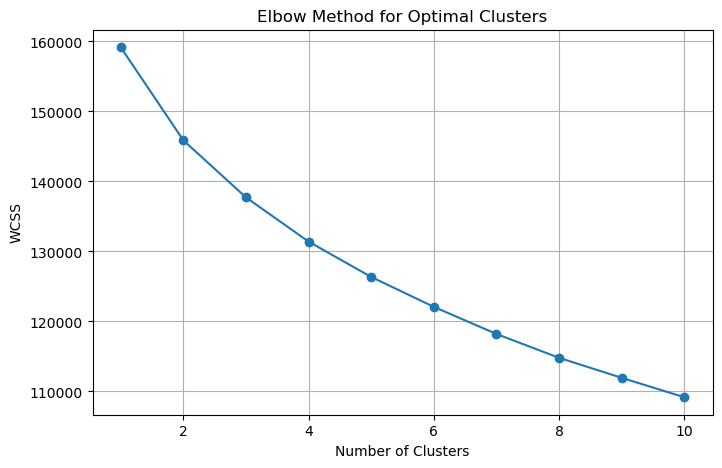

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 🎯 Select relevant features for segmentation
features = data[['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)',
                 'Calls Duration (mins/day)', 'Number of Apps Installed',
                 'E-commerce Spend (INR/month)', 'Streaming Time (hrs/day)',
                 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']]

# 🧮 Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 🔍 Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# 📉 Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [5]:
# 🚀 Apply K-Means with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(features_scaled)

# 📝 Check the first few entries with assigned segments
data[['User ID', 'Age', 'Gender', 'Location', 'Segment']].head()


,User ID,Age,Gender,Location,Segment
0,U00001,53,Male,Mumbai,3
1,U00002,60,Other,Delhi,3
2,U00003,37,Female,Ahmedabad,1
3,U00004,32,Male,Pune,3
4,U00005,16,Male,Mumbai,1


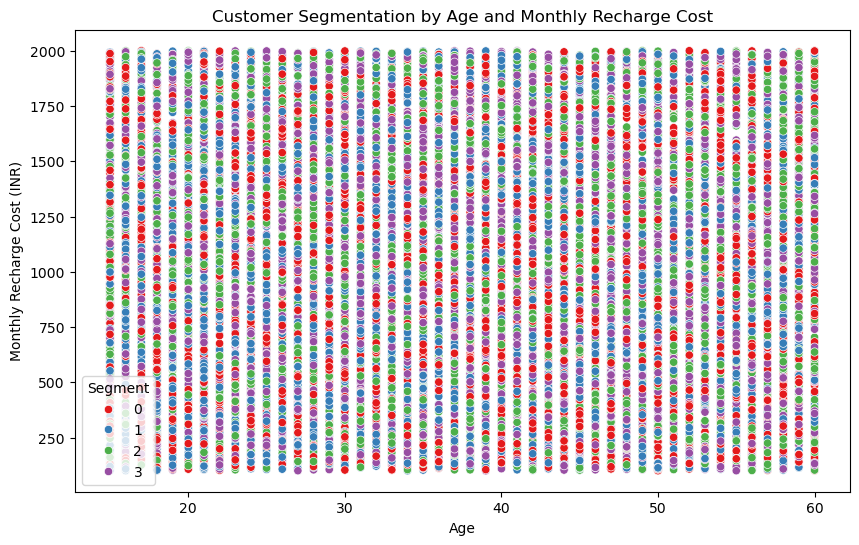

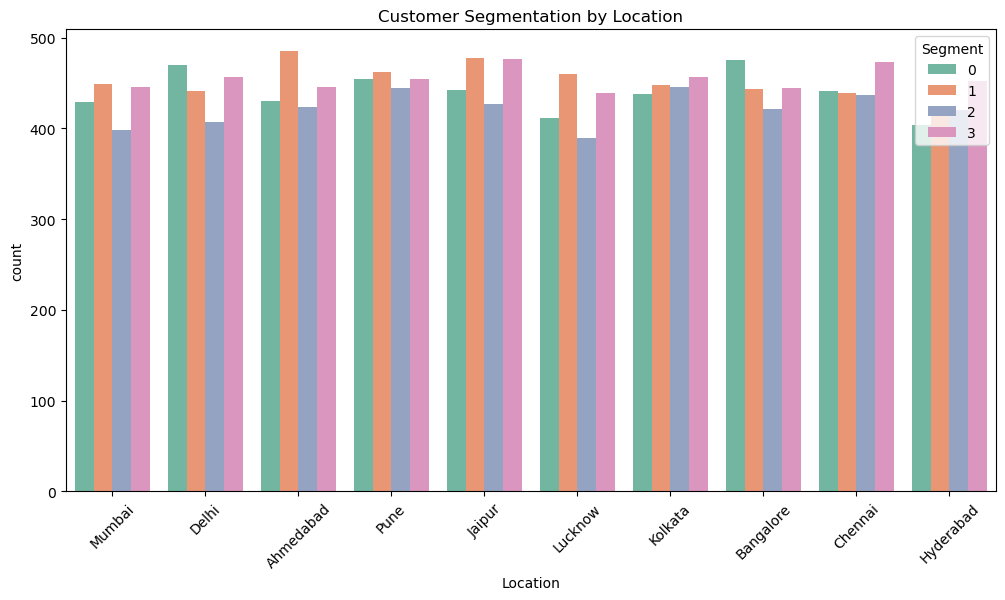

In [6]:
# 🎨 Visualizing Age vs. Monthly Recharge Cost by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Monthly Recharge Cost (INR)', hue='Segment', palette='Set1')
plt.title('Customer Segmentation by Age and Monthly Recharge Cost')
plt.xlabel('Age')
plt.ylabel('Monthly Recharge Cost (INR)')
plt.legend(title='Segment')
plt.show()

# 🌍 Visualizing Segments by Location
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Location', hue='Segment', palette='Set2')
plt.title('Customer Segmentation by Location')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()
